### Import Dependencies

In [1]:
import numpy as np
import pandas as pd

### Fetching Data

In [2]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### Visualization Imports


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

##### Create a ratings Dataframe with average ratings and number of ratings

In [7]:
# Average rating with respect to the movies
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [8]:
# Number of ratings with respect to the movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
# Creating DataFrame for Average rating with respect to the movies
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['number of ratings']= pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

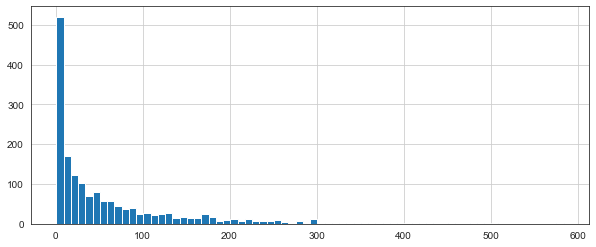

In [11]:
# Histogram for number of ratings
plt.figure(figsize=(10,4))
ratings['number of ratings'].hist(bins=70)

<AxesSubplot:>

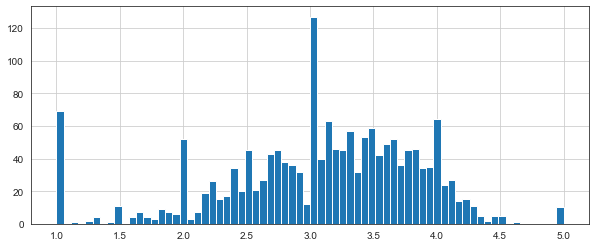

In [12]:
# Histogram for ratings
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

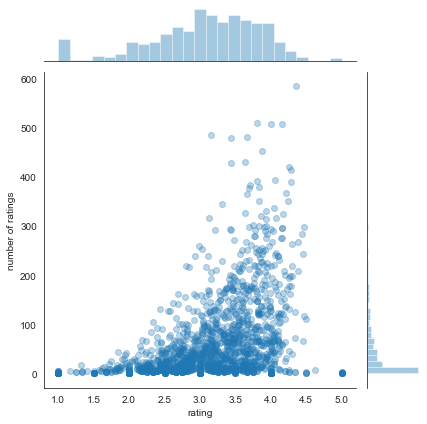

In [13]:
# Joint Plot of number of ratings and average ratings
sns.jointplot(x='rating', y='number of ratings', data=ratings, alpha=0.3)

### Recommending Similar movies

In [14]:
moviemat= df.pivot_table(index='user_id', columns='title', values= 'rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Most Rated Movies
ratings.sort_values('number of ratings', ascending=False).head(20)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### For Star War Movie

In [30]:
# Grab ratings for Star Wars (1977)
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

###### We can then use corrwith() method to get correlations between two pandas series:


In [31]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

c:\python38\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python38\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
# Removing NaN values and using a DataFrame instead of a series
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [34]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [35]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation,number of ratings
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Star Wars (1977),1.0,584
Man of the Year (1995),1.0,9
"Beans of Egypt, Maine, The (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [36]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


### For Pulp Fiction

In [38]:
# Grab ratings for Pupl Fiction
pulpfiction_user_ratings = moviemat['Pulp Fiction (1994)']
pulpfiction_user_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Pulp Fiction (1994), dtype: float64

In [39]:
similar_to_pulpfiction = moviemat.corrwith(pulpfiction_user_ratings)

c:\python38\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python38\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [40]:
# Removing NaN values and using a DataFrame instead of a series
corr_pulpfiction = pd.DataFrame(similar_to_pulpfiction, columns =['Correlation'])
corr_pulpfiction.dropna(inplace=True)
corr_pulpfiction.head()

,Correlation
title,
'Til There Was You (1997),-0.071429
1-900 (1994),0.755929
101 Dalmatians (1996),0.045124
12 Angry Men (1957),0.051940
187 (1997),-0.240381


In [41]:
corr_pulpfiction.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
The Innocent (1994),1.0
Talking About Sex (1994),1.0
Pulp Fiction (1994),1.0
Crossfire (1947),1.0
Tough and Deadly (1995),1.0
8 Seconds (1994),1.0
My Favorite Season (1993),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Daniel Defoe's Robinson Crusoe (1996),1.0


In [42]:
corr_pulpfiction = corr_pulpfiction.join(ratings['number of ratings'])
corr_pulpfiction.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),-0.071429,9
1-900 (1994),0.755929,5
101 Dalmatians (1996),0.045124,109
12 Angry Men (1957),0.051940,125
187 (1997),-0.240381,41


In [43]:
corr_pulpfiction.sort_values('Correlation', ascending=False).head(10)

,Correlation,number of ratings
title,,
The Innocent (1994),1.0,4
Talking About Sex (1994),1.0,5
Pulp Fiction (1994),1.0,394
Crossfire (1947),1.0,4
Tough and Deadly (1995),1.0,2
8 Seconds (1994),1.0,4
My Favorite Season (1993),1.0,3
Maya Lin: A Strong Clear Vision (1994),1.0,4
Daniel Defoe's Robinson Crusoe (1996),1.0,2


In [44]:
corr_pulpfiction[corr_pulpfiction['number of ratings']>100].sort_values('Correlation', ascending=False).head()

,Correlation,number of ratings
title,,
Pulp Fiction (1994),1.000000,394
"Cable Guy, The (1996)",0.472482,106
Trainspotting (1996),0.451906,250
True Romance (1993),0.416478,104
"People vs. Larry Flynt, The (1996)",0.404107,215
